In [78]:
import os,random
import numpy as np
import cv2 as cv
import sys
from tensorflow import keras 
project_dir = "/home/amazing/Documents/MRI_API"
dataset = os.path.join(project_dir, "dataset")
os.chdir(project_dir)
classes = ["N","S"]
normal = []
shrinkage= []
dataset_list = [normal,shrinkage]
img_size = (200,200)




print(dataset)


/home/amazing/Documents/MRI_API/dataset


In [79]:

def pass_training_data():
    for c in classes:
        class_path = os.path.join(dataset, c)
        class_num = classes.index(c)
        
        # Scan folders
        for scan in os.listdir(class_path):
            scan_images = os.path.join(class_path, scan)
         
            for img in os.listdir(scan_images):
                try:
                    image_path = os.path.join(scan_images, img)
                    # remove non jpg files and inbalid jpgs
                    if not image_path.split('/')[-1][0]=='.' and 'jpg' in image_path.split('/')[-1]:
                        picture = cv.imread(image_path)
                        picture=cv.resize(picture, img_size)
                        dataset_list[class_num].append(picture)
                    else:
                        print("Ivalid Image:", image_path.split('/')[-1], image_path.split('/')[-3])
                except Exception as e:
                    print(e)
                
       # dataset_list[class_num] = np.array(dataset_list[class_num])

In [80]:
pass_training_data()

Ivalid Image: ._50521501.jpg N
Ivalid Image: ._50521500.jpg N
Ivalid Image: ._50521498.jpg N
Ivalid Image: ._50521502.jpg N
Ivalid Image: ._50521499.jpg N
Ivalid Image: ._68637770.jpg N
Ivalid Image: ._export--26779101.jpg N
Ivalid Image: ._export--26779100.jpg N
Ivalid Image: ._export--26779103.jpg N
Ivalid Image: ._export--26779098.jpg N
Ivalid Image: ._export--26779099.jpg N
Ivalid Image: ._export--26779096.jpg N
Ivalid Image: ._export--26779102.jpg N
Ivalid Image: ._export--26779097.jpg N
Ivalid Image: ._export--67792892.jpg N
Ivalid Image: ._export--67792891.jpg N
Ivalid Image: ._export--67792894.jpg N
Ivalid Image: ._export--67792893.jpg N
Ivalid Image: ._export--28352983.jpg N
Ivalid Image: ._export--28352979.jpg N
Ivalid Image: ._export--28352982.jpg N
Ivalid Image: ._export--28352984.jpg N
Ivalid Image: ._export--28352986.jpg N
Ivalid Image: ._export--28352985.jpg N
Ivalid Image: ._export--28352987.jpg N
Ivalid Image: ._export--28352981.jpg N
Ivalid Image: ._export--28352988.j

['N', 'S']


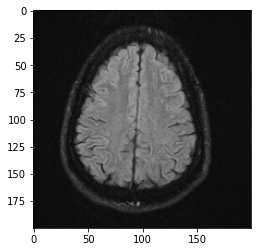

In [81]:
print(classes)
import matplotlib.pyplot as plt
# first image, first scan-folder, fist sectiion in Normal
test=dataset_list[0][0]
test = cv.cvtColor(test, cv.COLOR_BGR2RGB)
plt.imshow(test)
plt.show()


In [82]:
# NUMBER PER CLASS
for c in dataset_list:
        print(len(c), classes[dataset_list.index(c)])
        

scans = []


for label in dataset_list:
    
    for scan in label:
        scans.append([scan,dataset_list.index(label)])

74 N
73 S


In [83]:
scans[20][1]

0

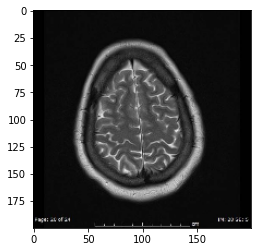

In [84]:
test = scans[20][0]
test = cv.cvtColor(test, cv.COLOR_BGR2RGB)
plt.imshow(test)
plt.show()

In [85]:

random.shuffle(scans)
print(len(scans))


147


In [86]:
x =[]
y=[]
for scan, label in scans:
    x.append(scan)
    y.append(label)

In [87]:
print(y)

[1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1]


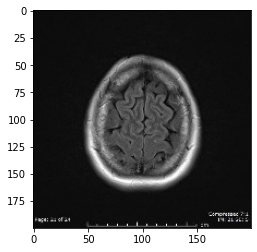

In [88]:
test = x[88]
test = cv.cvtColor(test, cv.COLOR_BGR2RGB)
plt.imshow(test)
plt.show()

In [89]:
x=np.array(x,dtype=np.uint8)
y=np.array(y,dtype=np.uint8)
print(x[0].shape)
x = x.reshape(-1, img_size[0], img_size[1], 3)
x = x/255
print(x.shape)

(200, 200, 3)
(147, 200, 200, 3)


In [90]:


# encode class values as integers
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras 

encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = keras.utils.to_categorical(encoded_Y)

In [91]:
dummy_y

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.

In [92]:
np.save("scans", x)
np.save("labels",dummy_y)